In [2]:
# Loading Necessary Libraries and Datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

electors_2009 = pd.read_csv("G:/Data Science ML AI/Python files/Projects/Code_Walkthrough_Indian_Election_Analysis_2009/Indian_Election_dataset_electors_2009.csv",delimiter=',')
candidates_2009 = pd.read_csv("G:/Data Science ML AI/Python files/Projects/Code_Walkthrough_Indian_Election_Analysis_2009/Indian_Election_dataset_candidates_2009.csv",delimiter=',')


In [3]:
#Reading the intial contents for electors dataset
electors_2009.head(10)

,STATE CODE,STATE,PC NO,PARLIAMENTARY CONSTITUENCY,Total voters,Total_Electors,TOT_CONTESTANT,POLL PERCENTAGE
0,S01,Andhra Pradesh,1,Adilabad,864165,1131211,9,76.39
1,S01,Andhra Pradesh,2,Peddapalle,905332,1315642,15,68.81
2,S01,Andhra Pradesh,3,Karimnagar,990646,1496211,15,66.21
3,S01,Andhra Pradesh,4,Nizamabad,891508,1333271,12,66.87
4,S01,Andhra Pradesh,5,Zahirabad,1017372,1359566,10,74.83
5,S01,Andhra Pradesh,6,Medak,1061993,1389721,9,76.42
6,S01,Andhra Pradesh,7,Malkajgiri,1206223,2343050,19,51.48
7,S01,Andhra Pradesh,8,Secundrabad,865357,1574818,23,54.95
8,S01,Andhra Pradesh,9,Hyderabad,732212,1393242,23,52.55
9,S01,Andhra Pradesh,10,CHELVELLA,1086510,1681664,15,64.61


In [4]:
#Reading the intial contents for candidates dataset
candidates_2009.head(10)

,ST_CODE,State_name,Month,Year,PC_Number,PC_name,PC_Type,Candidate_Name,Candidate_Sex,Candidate_Category,Candidate_Age,Party_Abbreviation,Total_Votes_Polled,Position,Alliance
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0,TDP
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0,UPA
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0,PRAP
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0,NDA
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0,BSP
5,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,BANKA SAHADEVU,M,ST,55.0,IND,16441.0,6.0,IND
6,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,GANTA PENTANNA,M,ST,36.0,IND,13378.0,7.0,IND
7,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,NETHAVAT RAMDAS,M,ST,39.0,IND,9157.0,8.0,IND
8,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ATHRAM LAXMAN RAO,M,ST,47.0,IND,7824.0,9.0,IND
9,S01,Andhra Pradesh,3,2009,2,Peddapalle,SC,DR.G.VIVEKANAND,M,SC,51.0,INC,313748.0,1.0,UPA


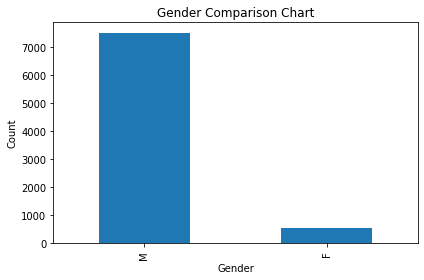

In [5]:
#Plot a bar chart to compare the number of male and female candidates in the election

# Finding the value counts of both the genders
gender = candidates_2009['Candidate_Sex'].value_counts()

#Plotting Bar chart for male and female candidates
gender.plot(kind = 'bar')

plt.xlabel('Gender')

plt.ylabel('Count')

plt.title('Gender Comparison Chart')

plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Winner candidates')

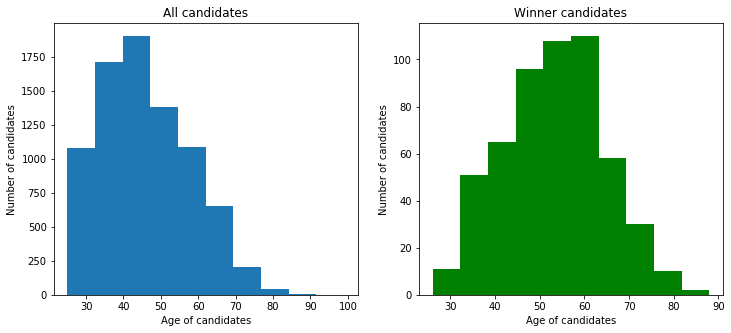

In [6]:
#Plot a histogram of the age of all the candidates as well as of the winner amongst them. Compare them and note an observation

# Selecting the subset of the data with winner candidates

winner = candidates_2009[candidates_2009['Position'] == 1]

fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(12,5))

#Histogram for age of all candidates
ax_1.hist(candidates_2009['Candidate_Age'],bins = 10)
ax_1.set_xlabel('Age of candidates')
ax_1.set_ylabel('Number of candidates')
ax_1.set_title('All candidates')

#Histogram for age of winner candidates
ax_2.hist(winner['Candidate_Age'],bins = 10,color = 'Green')
ax_2.set_xlabel('Age of candidates')
ax_2.set_ylabel('Number of candidates')
ax_2.set_title('Winner candidates')


Text(0.5, 1.0, 'Vote share pf Parties')

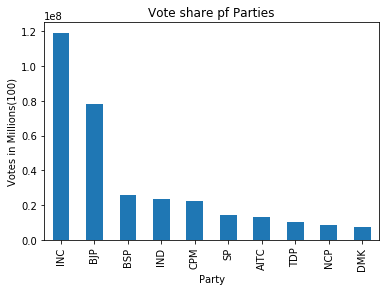

In [7]:
# Plot a bar graph to get the vote shares of different parties

# Group the dataframe by 'Party_Abbreviation' and sum the 'Total _Votes_Polled'
vote_share = candidates_2009.groupby('Party_Abbreviation')['Total_Votes_Polled'].sum()

# Plot the vote share with respect to different parties
party_vote_share = vote_share.sort_values(ascending = False)[:10].plot(kind = 'bar')
party_vote_share.set_xlabel('Party')
party_vote_share.set_ylabel('Votes in Millions(100)')
party_vote_share.set_title('Vote share pf Parties')

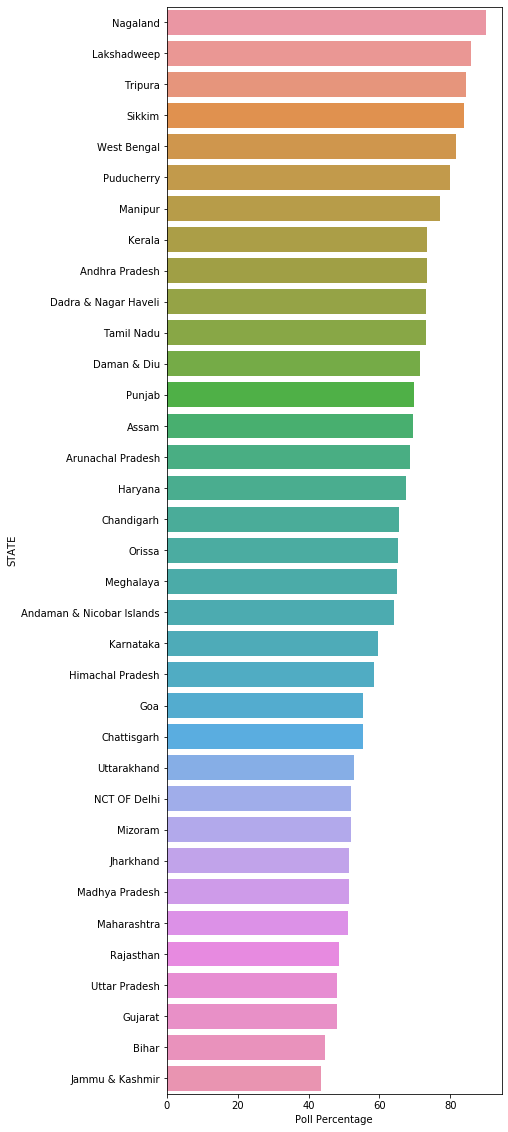

In [8]:
#Plot a barplot to compare the mean poll percentage of all the states

import seaborn as sns

# Mean statistics of all the states
poll_percentage = electors_2009.groupby('STATE').mean()

# Creating a dictionary of states and poll percentage
polls = poll_percentage[['POLL PERCENTAGE']].sort_values('POLL PERCENTAGE', ascending = False).to_dict()

# States and their poll percentage
states = list(polls['POLL PERCENTAGE'].keys())
state_percentage = list(polls['POLL PERCENTAGE'].values())

# Creating a dataframe
Data = {'STATE': states,'Poll Percentage': state_percentage}
DF = pd.DataFrame(data=Data)

# Generating a bar plot
ax = plt.subplots(figsize=(6, 20))

sns.barplot(x = DF['Poll Percentage'], y = DF['STATE'])

Text(0.5, 1.0, 'UP Seats Comparison')

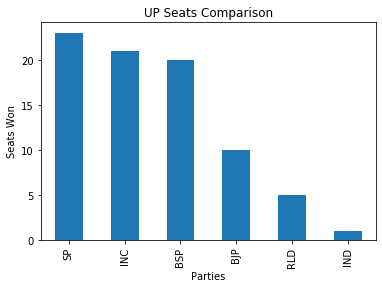

In [9]:
#Plot a bar plot to compare the seats won by different parties in Uttar Pradesh
UP_Win = candidates_2009.query("Position == 1 & State_name == 'Uttar Pradesh'")

UP = UP_Win['Party_Abbreviation'].value_counts(ascending=False)

UP.plot(kind = 'bar')

plt.xlabel('Parties')

plt.ylabel('Seats Won')

plt.title('UP Seats Comparison')


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

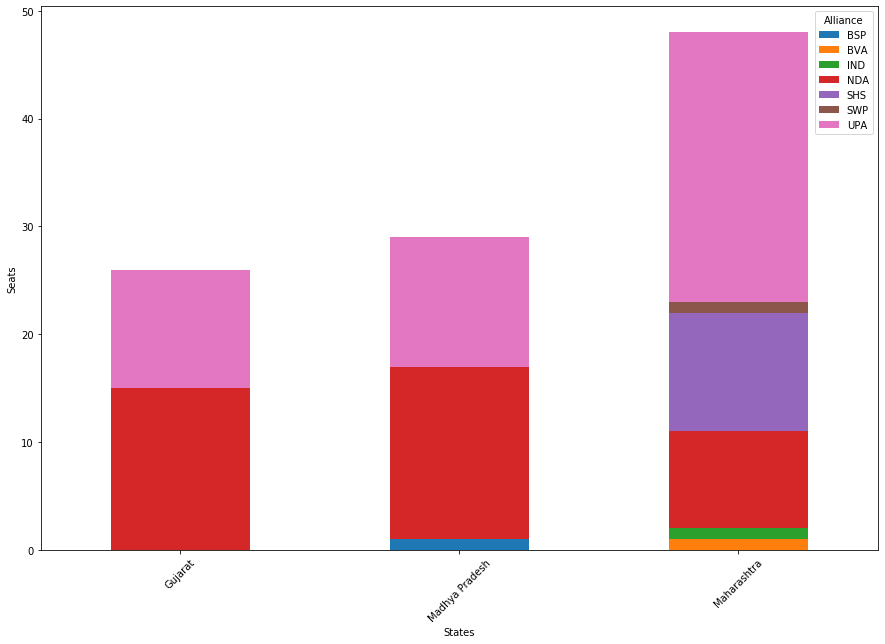

In [10]:
#Plot a stacked bar chart to compare the number of seats won by different Alliances in Gujarat,Madhya Pradesh and Maharashtra


# Subset of winner candidates
winner = candidates_2009.query("Position == 1")

# Subset the the dataset for the states of Gujarat, Maharashtra and Madhya Pradesh
states = winner.query("State_name == 'Gujarat' or State_name == 'Maharashtra' or State_name == 'Madhya Pradesh'")

# Stacked bar chart
states.groupby(['State_name','Alliance']).size().unstack().plot(kind='bar', stacked = True, figsize=(15,10))

plt.xlabel('States')
plt.ylabel('Seats')
plt.xticks(rotation=45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

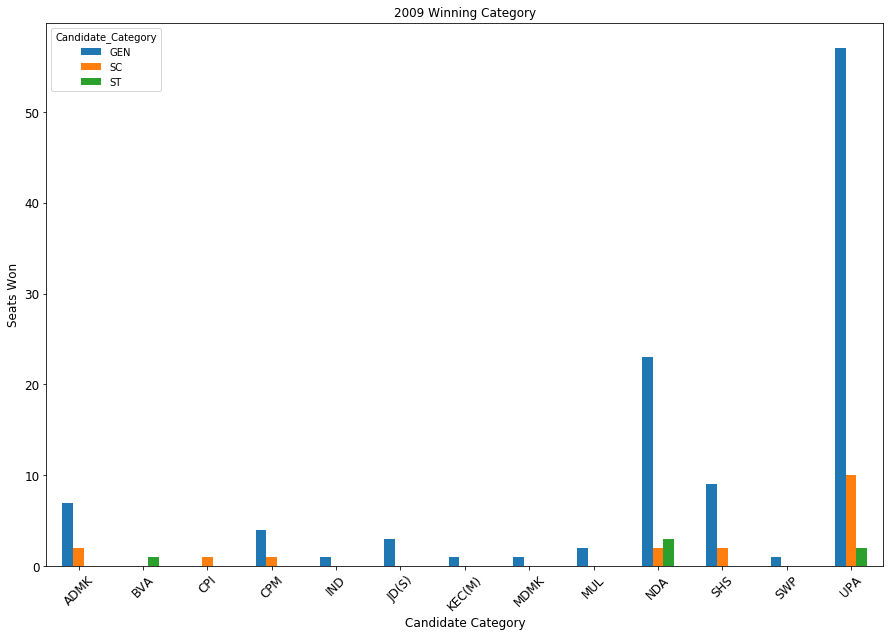

In [11]:
#Plot a grouped bar chart to compare the number of winner candidates on the basis of their caste in the states of Maharashtra, Kerala, Tamil Nadu and Karnataka

# Subset containing data of the given states
cat = candidates_2009.query("State_name == 'Maharashtra' or State_name == 'Kerala' or State_name == 'Tamil Nadu' or State_name == 'Karnataka'")

# Subset the data with the winner of each constituency of the mentioned states
cat = cat.query("Position == 1")

# Group the data according to `Alliance` and `Candidate_Category`
cat = cat.groupby(['Alliance','Candidate_Category'])['Position'].size().unstack()

# Plotting a grouped bar chart
cat.plot(kind = 'bar', figsize = (15,10), legend = True, fontsize = 12)
plt.xlabel('Candidate Category',fontsize = 12)
plt.ylabel('Seats Won', fontsize = 12)
plt.title('2009 Winning Category')
plt.xticks(rotation=45)


Text(0, 0.5, 'States')

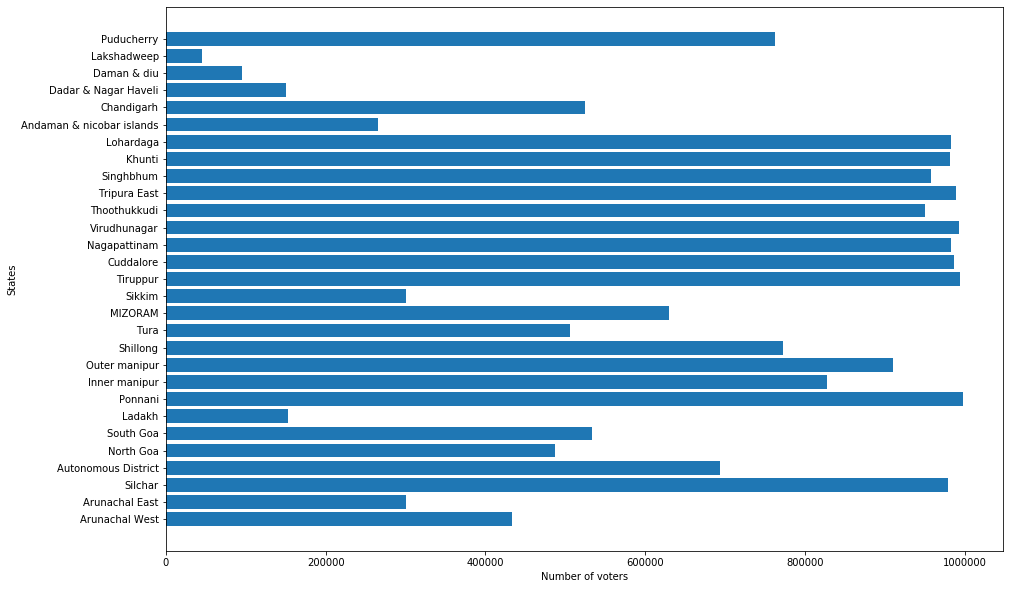

In [12]:
#Plot a horizontal bar graph of the Parliamentary constituency with total voters less than 100000

# Constituency with less than 100000 voters
voters = electors_2009.query("Total_Electors<1000000")

# Plot a horizontal bar graph to compare constituencies with less than 1000000 voters
plt.figure(figsize=(15,10))

plt.barh(voters['PARLIAMENTARY CONSTITUENCY'], voters['Total_Electors'])

plt.xlabel('Number of voters')

plt.ylabel('States')


(-1.1324296122098951,
 1.1015442714170582,
 -1.1023350197623656,
 1.1263438506116112)

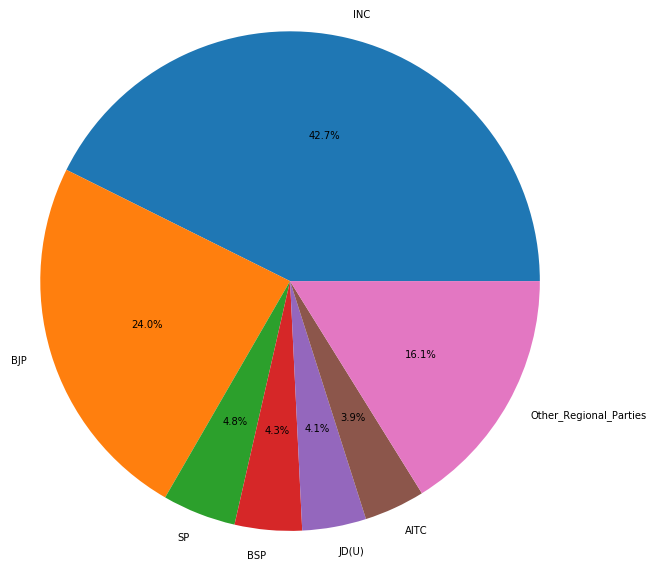

In [18]:
#Plot a pie chart with the top 10 parties with majority seats in the elections

# Candidates with 1st position in their respective constituiency
winner = candidates_2009.query("Position == 1")

# Find the parties with the number of seats won by them
final = winner['Party_Abbreviation'].value_counts()[:6].to_dict()

# count of other regional parties
final['Other_Regional_Parties'] = sum(winner.Party_Abbreviation.value_counts()) - sum(winner['Party_Abbreviation'].value_counts()[:10])

# Pie chart
plt.figure(figsize = (10,10))
plt.pie(final.values(),labels= final.keys(), autopct='%1.1f%%')
plt.axis('equal')